In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Function to create and display the confusion matrix
def plot_confusion_matrix(cm, classes, title, dataset_name):
    plt.figure(figsize=(8, 8))
    percentages = (cm.T / cm.sum(axis=1) * 100).T
    plt.imshow(percentages, interpolation='nearest', cmap=plt.cm.Blues, vmin=0, vmax=100)
    plt.title(f'Confusion Matrix - {title} - {dataset_name}')
    plt.colorbar(label='Percentage')
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    for i in range(len(classes)):
        for j in range(len(classes)):
            plt.text(j, i, f"{cm[i, j]}\n{percentages[i, j]:.1f}%", horizontalalignment='center',
                     color='white' if percentages[i, j] > 50 else 'black')
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    plt.close()

In [3]:
# Import Data
file_path = '/data/ksa/00_Data_Input/relabelled_data_ksa_explore.csv'
data = pd.read_csv(file_path)
data.head()

,idpoint,idsubsegment,idsegment,nth,periode,observation,MGRS,VH_0,VH_1,VH_2,...,F12,F13,F14,F15,F16,F17,class,bulan,tahun,idkab
0,320101008b1#01,320101008b1,320101008,9,2022_30,99.0,48MYU,-1387,-1368,-1351,...,1.000000,0.785398,-31.000000,-1.538549,-217.9999999999,-1.5662092030054973,P,9,2022,3201
1,320101008b1#01,320101008b1,320101008,10,2023_03,99.0,48MYU,-1434,-1415,-1377,...,1.000000,0.785398,-18.777778,-1.517592,-232.9999999999,-1.5665045076528836,P,10,2023,3201
2,320101008b2#01,320101008b2,320101008,4,2022_18,99.0,48MYU,-948,-1098,-1398,...,105.600000,1.561327,1.000000,0.785398,440.0000000001,1.5685236034352557,P,4,2022,3201
3,320101008b2#01,320101008b2,320101008,5,2022_20,5.0,48MYU,-1424,-1248,-948,...,7.428571,1.436985,-238.000000,-1.566595,-83.9999999999,-1.5588921272365726,PL,5,2022,3201
4,320101008b2#01,320101008b2,320101008,12,2023_07,99.0,48MYU,-1479,-1438,-1356,...,10.600000,1.476735,-61.500000,-1.554538,-100.9999999999,-1.5608956602068982,P,12,2023,3201


In [4]:
# Filter features that start with VH_0 to VH_30
VH_columns = [col for col in data.columns if col.startswith('VH_')]
X = data[VH_columns]
y = data['class']  # Assuming the target variable is in a column named 'class'

# Splitting the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Using RandomForestClassifier model as an example
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_val_pred = model.predict(X_val)

In [5]:
# Calculating evaluation metrics
accuracy_val_pred = accuracy_score(y_val, y_val_pred)
precision_val_pred = precision_score(y_val, y_val_pred, average='weighted')
recall_val_pred = recall_score(y_val, y_val_pred, average='weighted')
f1_micro_val_pred = f1_score(y_val, y_val_pred, average='micro')
f1_macro_val_pred = f1_score(y_val, y_val_pred, average='macro')
cm = confusion_matrix(y_val, y_val_pred)

In [6]:
# Displaying evaluation metrics
print("Validation Accuracy:", accuracy_val_pred)
print("Validation Precision:", precision_val_pred)
print("Validation Recall:", recall_val_pred)
print("Validation F1 Micro:", f1_micro_val_pred)
print("Validation F1 Macro:", f1_macro_val_pred)

Validation Accuracy: 0.5664639443961772
Validation Precision: 0.5453649183109729
Validation Recall: 0.5664639443961772
Validation F1 Micro: 0.5664639443961772
Validation F1 Macro: 0.4473695795735628


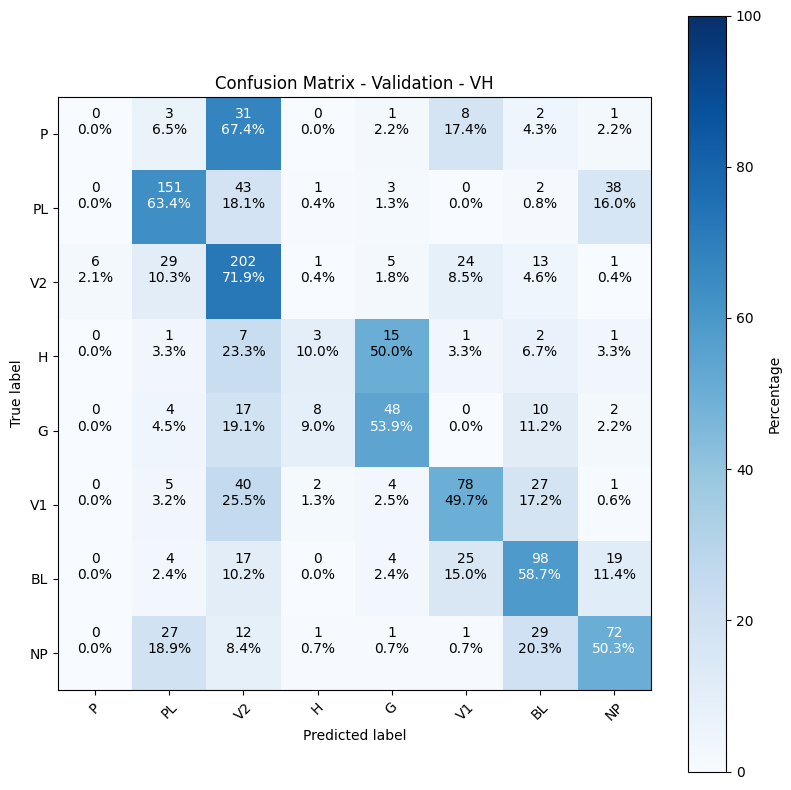

In [7]:
# Displaying the confusion matrix
plot_confusion_matrix(cm, classes=y.unique(), title="Validation", dataset_name="VH")